In [1]:
from fair import FAIR
from fair.interface import fill, initialise

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
f = FAIR(n_layers=2)

In [3]:
f.define_time(1764, 2500, 1)
print(f.timebounds)
print(f.timepoints)

[1764. 1765. 1766. 1767. 1768. 1769. 1770. 1771. 1772. 1773. 1774. 1775.
 1776. 1777. 1778. 1779. 1780. 1781. 1782. 1783. 1784. 1785. 1786. 1787.
 1788. 1789. 1790. 1791. 1792. 1793. 1794. 1795. 1796. 1797. 1798. 1799.
 1800. 1801. 1802. 1803. 1804. 1805. 1806. 1807. 1808. 1809. 1810. 1811.
 1812. 1813. 1814. 1815. 1816. 1817. 1818. 1819. 1820. 1821. 1822. 1823.
 1824. 1825. 1826. 1827. 1828. 1829. 1830. 1831. 1832. 1833. 1834. 1835.
 1836. 1837. 1838. 1839. 1840. 1841. 1842. 1843. 1844. 1845. 1846. 1847.
 1848. 1849. 1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858. 1859.
 1860. 1861. 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870. 1871.
 1872. 1873. 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882. 1883.
 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894. 1895.
 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907.
 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919.
 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 19

In [4]:
# Define scenarios
f.define_scenarios(["rcp85"])

# Define configurations
f.define_configs(["default"])

In [5]:
# Define species
species = ['CO2']

# Define specie properties
properties = {
    'CO2': {
        'type': 'co2',
        'input_mode': 'emissions',
        'greenhouse_gas': True,  # it doesn't behave as a GHG itself in the model, but as a precursor
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    }}

f.define_species(species, properties)

In [6]:
f.ghg_method='myhre1998'

In [7]:
f.allocate()

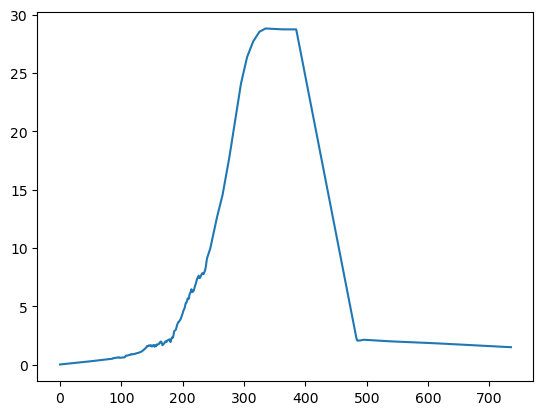

In [8]:
rcp85_emissions = np.load("rcp85_emissions.npy")
co2_emissions = np.sum(rcp85_emissions[:,[1,2]], axis=1)

f.emissions.loc[{"scenario":"rcp85", "specie":"CO2", "config":"default"}] = co2_emissions

plt.plot(co2_emissions)

In [9]:
initialise(f.concentration, 278.3, specie='CO2')
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)

In [10]:
fill(f.climate_configs["ocean_heat_transfer"], [0.67, 0.67], config='default')
fill(f.climate_configs["ocean_heat_capacity"], [8.2, 109], config='default')
fill(f.climate_configs["deep_ocean_efficacy"], 1.28, config='default')

In [11]:
f.climate_configs

<xarray.Dataset>
Dimensions:                (config: 1, layer: 2)
Coordinates:
  * config                 (config) <U7 'default'
  * layer                  (layer) int64 0 1
Data variables:
    ocean_heat_transfer    (config, layer) float64 0.67 0.67
    ocean_heat_capacity    (config, layer) float64 8.2 109.0
    deep_ocean_efficacy    (config) float64 1.28
    stochastic_run         (config) bool False
    sigma_eta              (config) float64 0.5
    sigma_xi               (config) float64 0.5
    gamma_autocorrelation  (config) float64 2.0
    seed                   (config) uint32 0
    use_seed               (config) bool False
    forcing_4co2           (config) float64 8.0

In [12]:
f.fill_species_configs()

In [13]:
sel = {"config":"default", "specie":"CO2"}
f.species_configs.unperturbed_lifetime.loc[sel] = np.array([1000000,394.4,36.54,4.304]) 

In [14]:
f.run()

Running 1 projections in parallel:   0%|          | 0/736 [00:00<?, ?timesteps/s]

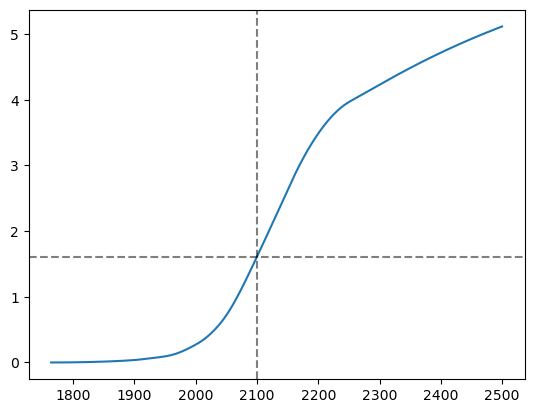

In [15]:
plt.plot(f.timebounds, f.temperature.loc[dict(scenario='rcp85', layer=0)], label=f.configs)
plt.axvline(2100, color='k', alpha = 0.5, linestyle="dashed")
plt.axhline(f.temperature.sel(dict(timebounds=2100, scenario='rcp85', layer=0)), color='k', alpha = 0.5, linestyle="dashed")

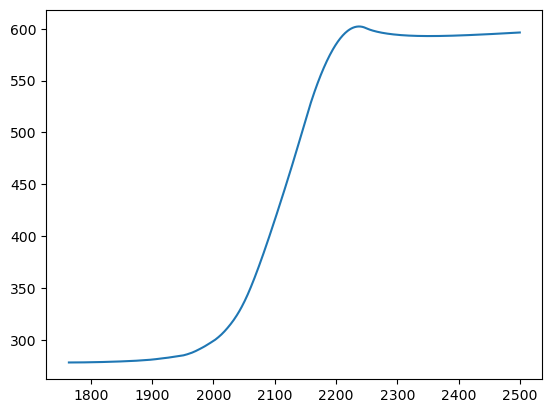

In [16]:
plt.plot(f.timebounds, f.concentration.loc[dict(scenario='rcp85', specie="CO2")], label=f.configs)

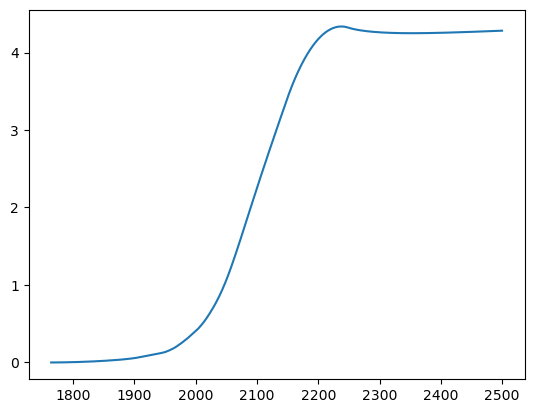

In [17]:
plt.plot(f.timebounds, f.forcing.loc[dict(scenario='rcp85', specie="CO2")], label=f.configs)

In [18]:
np.save("T_rcp85_fair_2", f.temperature.loc[dict(scenario='rcp85', layer=0)])
np.save("C_rcp85_fair_2", f.concentration.loc[dict(scenario='rcp85', specie="CO2")])
np.save("F_rcp85_fair_2", f.forcing.loc[dict(scenario='rcp85', specie="CO2")])